# Sentiment Analysis:

Sentiment analysis is the process of determining the emotional tone or sentiment expressed in a piece of text, such as a review, comment, or social media post. It involves using natural language processing (NLP) techniques to analyze the subjective information present in the text and classify it as positive, negative, or neutral.

# About the dataset:

This dataset contains reviews of various food products available on Amazon, encompassing a timeframe of over 10 years. It comprises approximately 500,000 reviews, covering the period up until October 2012. Each review provides essential details such as product information, user information, ratings, and a plain text review. Additionally, the dataset incorporates reviews from diverse categories across Amazon's platform.

We are downloading the data from Kaggle to perform our analysis

**1. Importing libraries and reading the data**

In [1]:
import pandas as pd
import numpy as np

# Data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the plotting style to 'ggplot'
plt.style.use('ggplot')

# For NLP
import nltk

Pandas is a powerful library used for data manipulation and analysis.

NumPy is a fundamental library for scientific computing in Python, providing support for large, multi-dimensional arrays and mathematical functions.

Matplotlib is a widely used data visualization library in Python, and pyplot provides a simple interface for creating plots and charts.

Seaborn is a statistical data visualization library that builds on top of Matplotlib, providing additional plotting functions and aesthetic enhancements.

NLTK is a powerful library for natural language processing tasks such as tokenization, stemming, lemmatization, and sentiment analysis.

In [2]:
# Reading the data
df = pd.read_csv('/Users/prashastisaraf/Downloads/archive/Reviews.csv')

In [3]:
print(df.shape)
#The shape attribute returns a tuple with the number of rows and columns.

(1000, 10)


In [60]:
df.head(2)
#head() prints top rows of data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [5]:
df.columns
# Get the names of all columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

**2. Data Preprocessing:**

In [6]:
print(df.isnull().sum())

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64


No null values present

**3. Exploratory Data Analysis:**

In [7]:
#Accessing the 'Score' column of the df and calculating and sorting value counts

ax = df['Score'].value_counts().sort_index()
print(ax)

1     98
2     47
3     75
4    138
5    642
Name: Score, dtype: int64


In [16]:
ratings = df["Score"].value_counts().sort_index()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px

figure = px.pie(df, 
                values=quantity, 
                names=numbers,hole = 0.5, width=500, height=500, title ="Distribution of Reviews by Stars")

    
figure.show()

**4. NLTK**

- **Tokenisation:** It is the process of breaking down a sequence of text into smaller units called tokens

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/prashastisaraf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
from nltk.tokenize import WordPunctTokenizer

In [25]:
# we will tokenise the first 10 reviews
reviews = df['Text'][:10]
print(reviews)

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
5    I got a wild hair for taffy and ordered this f...
6    This saltwater taffy had great flavors and was...
7    This taffy is so good.  It is very soft and ch...
8    Right now I'm mostly just sprouting this so my...
9    This is a very healthy dog food. Good for thei...
Name: Text, dtype: object


In [20]:
tokenized_reviews = reviews.apply(nltk.word_tokenize)
print(tokenized_reviews)

0    [I, have, bought, several, of, the, Vitality, ...
1    [Product, arrived, labeled, as, Jumbo, Salted,...
2    [This, is, a, confection, that, has, been, aro...
3    [If, you, are, looking, for, the, secret, ingr...
4    [Great, taffy, at, a, great, price, ., There, ...
5    [I, got, a, wild, hair, for, taffy, and, order...
6    [This, saltwater, taffy, had, great, flavors, ...
7    [This, taffy, is, so, good, ., It, is, very, s...
8    [Right, now, I, 'm, mostly, just, sprouting, t...
9    [This, is, a, very, healthy, dog, food, ., Goo...
Name: Text, dtype: object


The **nltk.word_tokenize** function splits each review into a list of individual words or tokens

-  **Parts of Speech Tagging:** It is the process of assigning grammatical tags or labels to individual words in a text based on their syntactic category and role within a sentence 

In [13]:
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/prashastisaraf/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [26]:
pos_tagged_reviews = tokenized_reviews.apply(nltk.pos_tag)
print(pos_tagged_reviews)

0    [(I, PRP), (have, VBP), (bought, VBN), (severa...
1    [(Product, NNP), (arrived, VBD), (labeled, VBN...
2    [(This, DT), (is, VBZ), (a, DT), (confection, ...
3    [(If, IN), (you, PRP), (are, VBP), (looking, V...
4    [(Great, NNP), (taffy, NN), (at, IN), (a, DT),...
5    [(I, PRP), (got, VBD), (a, DT), (wild, JJ), (h...
6    [(This, DT), (saltwater, NN), (taffy, NN), (ha...
7    [(This, DT), (taffy, NN), (is, VBZ), (so, RB),...
8    [(Right, RB), (now, RB), (I, PRP), ('m, VBP), ...
9    [(This, DT), (is, VBZ), (a, DT), (very, RB), (...
Name: Text, dtype: object


The **nltk.pos_tag** function assigns a Parts of Speech tag to each token in the review

# VADER Seniment Scoring

**VADER (Valence Aware Dictionary and sEntiment Reasoner)** is a lexicon and rule-based sentiment analysis tool that is specifically designed for sentiment analysis of social media text. It is included in the NLTK (Natural Language Toolkit) library.

VADER sentiment scoring provides a way to quantify the sentiment polarity of a given text. It analyzes the text and assigns sentiment intensity scores to individual words or phrases, as well as to the overall sentiment of the text. The scores range from -1 (extremely negative) to +1 (extremely positive).

I will use the **SentimentIntensityAnalyzer** from the NLTK library. The SentimentIntensityAnalyzer is a class provided by NLTK (Natural Language Toolkit) that performs sentiment analysis on text.

Then use the **polarity_scores()** method of the analyzer to compute the sentiment scores for the given sentence. The resulting scores object will contains four keys: 'neg' (negative), 'neu' (neutral), 'pos' (positive), and 'compound' (compound score, which represents the overall sentiment of the text).

In [15]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/prashastisaraf/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [27]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [28]:
from tqdm.notebook import tqdm

**tqdm** is a library that provides a progress bar for iterative processes. It helps visualize the progress of the loop.

In [29]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

First create an empty dictionary called res to store the sentiment scores for each text in the dataset.

Loop and iterate over the entire df, retrieve the value of the 'Text' and 'Id' column from each row and perform sentiment analysis to calculate sentiment scores for each text.

**sia.polarity_scores()** applies sentiment analysis using **SentimentIntensityAnalyzer** to the text and returns a dictionary of sentiment scores for the text.

In [30]:
#Processing the sentiment scores and merging them back with the original DataFrame

vaders = pd.DataFrame(res).T

Create a new DataFrame called vaders by transposing the res dictionary. Each sentiment score in the dictionary becomes a column in the DataFrame, with the keys (IDs) as the row index.

In [31]:
vaders.head()

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468


In [32]:
vaders = vaders.reset_index().rename(columns={'index': 'Id'})

This line resets the index of the vaders DataFrame, converting the current row index (which contains the IDs) into a regular column. The rename() function is then used to rename the column from 'index' to 'Id', representing the unique identifier for each text.

In [33]:
vaders = vaders.merge(df, how='left')

This line merges the vaders DataFrame with the original DataFrame df. The merge() function combines the two DataFrames based on a common column, which in this case is the 'Id' column. The 'how='left' argument specifies a left join, ensuring that all rows from the vaders DataFrame are included in the merged result, even if there are missing values in the original df DataFrame.

In [54]:
vaders.head(1)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,predicted_label
0,1,0.0,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive


The vaders DataFrame now contains the sentiment scores as additional columns, merged with the corresponding rows from the original DataFrame df.

**Checking the Accuracy of the model:**

In [51]:
vaders['predicted_label'] = \
    vaders['compound'].apply(lambda x: 'positive' if x > 0.5 else 'negative' if x < 0 else 'neutral')

We are adding another column to our dataframe based on the value of the coumpound score to then check our model for accuracy

In [56]:
vaders.head(1)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,predicted_label
0,1,0.0,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive


In [57]:
# Map numerical scores to sentiment labels
sentiment_mapping = {1: 'negative', 2: 'negative', 3: 'neutral', 4: 'positive', 5: 'positive'}

# Create a new column for mapped sentiment labels
vaders['mapped_label'] = vaders['Score'].map(sentiment_mapping)

In [59]:
# Calculate accuracy
accuracy = (vaders['predicted_label'] == vaders['mapped_label']).mean()

# Print accuracy
print('Accuracy:', accuracy)

Accuracy: 0.759


**The gives us an accuracy of 75.9%**

**Exploring VADER results**

- **Plot showing a relation between compound score and 'Score'**

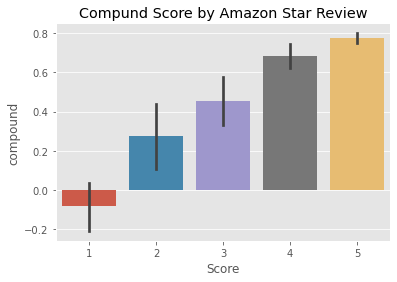

In [35]:
ax = sns.barplot(data=vaders, x = 'Score', y ='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

Each bar in the plot corresponds to a specific score value, and the height of the bar represents the corresponding compound sentiment score. More the score (1 to 5), more the compound score (-1 to +1).

- **Plot showing relation between pos, neu, neg scores and 'Score'**

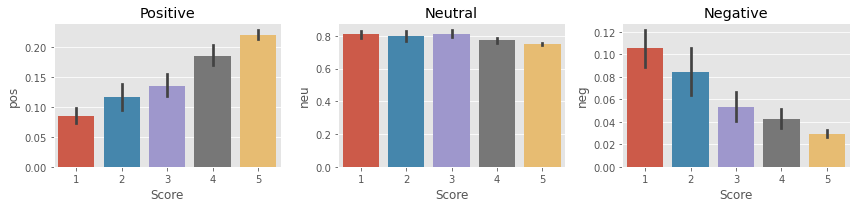

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

For 5 score, pos score is highest and neg score is the least

- **Checking the scores for a random example**

In [48]:
row_index = 120
example = vaders.loc[row_index , ['neg','pos','compound', 'Score','Text']]
print(example)

neg                                                     0.026
pos                                                     0.215
compound                                               0.9509
Score                                                       5
Text        I have done a lot of research to find the best...
Name: 120, dtype: object


- **Examples where the model scoring and review score differ the most**

In [41]:
# a positive 1 star review
vaders.query('Score == 1') \
    .sort_values('pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [49]:
# a negative 5 star review
vaders.query('Score == 5') \
    .sort_values('neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

# Conclusion 

We used amazon food reviews dataset to perform sentiment analysis using the VADER model. The accuracy of the model is 75.9%. To improve the results of sentiment analysis we can use roBERTa model.